# K-Means Clustering

Given a set of k clusters, the algorithm iterates over two steps to form clusters of the given data. These steps are:
* Expectation: assigns every point to the closest mean centroid.
* Maximization: recomputes the centroids given the new formed clusters.

This is done until the algorithm converges, that is, until the centroids do not change its location or simply with a max. number of iterations.

## Complexity: O(k n T)  = O(n)

* k : number of centroids.
* n : number of samples.
* T : number of iterations.

## Implementation

In [1]:
import numpy as np
import random
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target

# just reduction of iris_data to two dimensional so we can plot it afterwards
iris_data = [d[:2] for d in iris_data]

In [2]:
iris_data[2]

array([4.7, 3.2])

### Distance function

In this case the distance is Euclidean distance, but could be any specific distance, like for example, levenshtein.

In [3]:
def euclidean_dist(l1, l2):
    return np.linalg.norm(l1 - l2)

In [4]:
euclidean_dist(iris_data[2], iris_data[20])

0.7280109889280519

In [5]:
def init_centroids(data, k):
    centroids = []
    for i in range(k):
        centroids.append(random.choice(data))
    
    return centroids

In [6]:
centroids = init_centroids(iris_data, 3)
centroids

[array([4.5, 2.3]), array([4.9, 3.1]), array([5.8, 2.8])]

In [7]:
euclidean_dist(iris_data[2], centroids)

1.5066519173319366

In [33]:
def k_means_clustering(data, k, max_iter):
    centroids = init_centroids(data, k)
    assigned_centroids = np.zeros(len(data))
    distances = np.zeros(k)
    converged = np.zeros(k)
    # Expectation: assign data points to closest cluster
    for i in range(max_iter):
        old_centroids = centroids.copy()
        
        for j, d in enumerate(data):
            distances = [euclidean_dist(c, d) for c in centroids]
            assigned_centroids[j] = np.argmin(distances) # gets index of min distance to point
            
        # Maximization: compute new centroid location
        for j in range(k):
            centroid_data = [data[d] for d in range(len(data)) if assigned_centroids[d] == j]
            centroids[j] = np.mean(centroid_data, axis = 0)
            
            converged[j] = np.array_equal(old_centroids[j], centroids[j])
        
        if all(converged):
            print("Converged in iteration {}.".format(i))
            return (assigned_centroids, centroids)
            
    return (assigned_centroids, centroids)

### Results

centroids: [array([6.80208333, 3.06875   ]), array([5.76346154, 2.69038462]), array([5.006, 3.418])]
assigned_centroids: [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1.]


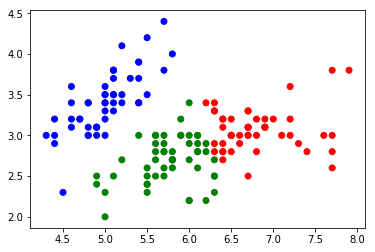

In [47]:
clusters = k_means_clustering(iris_data, k = 3, max_iter = 10)
print("centroids: {}".format(clusters[1]))
print("assigned_centroids: {}".format(clusters[0]))

c = ['red', 'green', 'blue']
colors = [c[int(i)] for i in clusters[0]]
iris_x = [d[0] for d in iris_data]
iris_y = [d[1] for d in iris_data]
plt.scatter(x = iris_x, y = iris_y, color = colors)

## Notes:

* The k-means problem is solved using either Lloyd's or Elkan's algorithm.
* The average complexity is given by O(k n T), were n is the number of samples and T is the number of iteration.
* The worst case complexity is given by O(n^(k+2/p)) with n = n_samples, p = n_features.
* In practice, the k-means algorithm is very fast (one of the fastest clustering algorithms available), but it falls in local minima. That's why it can be useful to restart it several times.

## Links:
* None yet